# 데이터의 불균형 문제에 대한 처리 방법 
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 이상을 정확하게 분류 하는것이 중요 
- 보통 이상의 데이터를 target 데이터로 사용하는 경우가 많다. 
- 데이터 불균형한 경우 분류의 성능과 target 데이터를 정확하게 분류하는것에 일치하지 않는 부분이 발생(예측이 떨어진다.)
- 소수의 데이터를 중요도가 낮게 판단이 되서 실제 모델이 해당하는 예측을 적게 발생
- 이러한 경우에는 소수의 데이터를 증가시키는 오버 샘플링, 다수의 데이터에서 일부만 사용하는 언더 샘플링

In [196]:
# 샘플링 라이브러리 설치
# !pip install imbalanced-learn

- 언더 샘플링 
    - 다수의 라벨을 가진 데이터를 샘플링 하여 소수의 데이터의 수 수준으로 감소 시키는 방법 
    - 이 기법은 데이터 불균형 문제에 대한 해결은 되지만 전체 데이터 개수가 감소하여 학습의 성능을 떨어뜨릴수 있다. 

In [197]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [198]:
# 랜덤 데이터셋을 생성
# 90:10의 비율로 데이터를 생성 

x, y = make_classification(
    n_samples= 1000, 
    n_features= 5, 
    weights=[0.9], 
    flip_y=0
)

In [199]:
x

array([[-1.59057322, -2.60265524, -2.04299928,  0.5997269 , -1.54537599],
       [ 0.89913833,  1.35403843,  1.17662618,  1.00868259, -0.79352982],
       [ 1.33054628,  2.12145299,  1.71934122, -0.95959949,  0.50029105],
       ...,
       [-0.7191218 , -1.18975201, -0.92125012, -1.73115637, -0.88432442],
       [ 1.26242897,  2.03045648,  1.62805412,  0.13292379,  0.72514447],
       [ 0.64915475,  1.00052089,  0.84524035,  0.05962694, -0.24665767]],
      shape=(1000, 5))

In [200]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [201]:
Counter(y)

Counter({np.int64(0): 901, np.int64(1): 99})

In [202]:
df = pd.DataFrame(data = x)
df['target'] = y

df.head()

,0,1,2,3,4,target
0,-1.590573,-2.602655,-2.042999,0.599727,-1.545376,0
1,0.899138,1.354038,1.176626,1.008683,-0.793530,0
2,1.330546,2.121453,1.719341,-0.959599,0.500291,0
3,-0.478508,-0.826775,-0.606496,-0.348286,-1.087718,0
4,0.357745,0.528609,0.470029,-0.897136,-0.459799,0


In [203]:
# RandomUnderSampler class 생성
undersampler = RandomUnderSampler()

In [204]:
# undersampler 안에 있는 함수를 호출 
x_under, y_under = undersampler.fit_resample(x, y)

In [205]:
under_df = pd.DataFrame(data = x_under)

under_df['target'] = y_under

under_df['target'].value_counts()

target
0    99
1    99
Name: count, dtype: int64

In [206]:
# undersampler에서 데이터의 비율을 변경 
# class 생성시 비율을 지정 
# sampling_strategy 매개변수 -> 소수의 데이터의 비율을 의미(다수의 데이터의 개수를 지정)
undersampler2 = RandomUnderSampler(sampling_strategy= 0.3)
x_under2, y_under2 = undersampler2.fit_resample(x, y)

In [207]:
Counter(y_under2)

Counter({np.int64(0): 330, np.int64(1): 99})

- 오버샘플링 
    - 소수의 데이터를 다수의 데이터의 개수만큼 증식시켜 학습에 사용하기 위한 방법 
    - 데이터의 손실이 없기때문에 일반적으로 언더 샘플링에 비해 주로 사용

- 랜덤오버샘플링 
    - 소수의 데이터를 단순 복제하여 다수의 데이터와의 비율을 맞춰주는 방법 
    - 데이터가 단순 복제이기때문에 분포가 변하지 않는다
    - 단순하게 수가 증가하기 때문에 가중치 발생
    - 오버피팅의 위험성이 존재하지만 데이터 분균형 문제를 해결하는 것이 더 유효

In [208]:
from imblearn.over_sampling import RandomOverSampler

In [209]:
oversampler = RandomOverSampler()

In [210]:
x_over, y_over = oversampler.fit_resample(x, y)

In [211]:
Counter(y_over)

Counter({np.int64(0): 901, np.int64(1): 901})

- SMOTE
    - 소수의 데이터의 관측 값에 대한 K개의 최근접 양수를 이웃으로 찾고, 관측 값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법 

In [212]:
from imblearn.over_sampling import SMOTE

In [213]:
smote_sampler = SMOTE()

In [214]:
x_sm, y_sm = smote_sampler.fit_resample(x, y)

In [215]:
Counter(y_sm)

Counter({np.int64(0): 901, np.int64(1): 901})

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
x[ : , 1 ]

array([-2.60265524e+00,  1.35403843e+00,  2.12145299e+00, -8.26774718e-01,
        5.28608759e-01,  9.77173008e-01,  1.57855507e+00, -1.63263919e+00,
       -1.19721338e+00, -4.62420677e-01,  6.30678954e-01, -1.06933613e+00,
       -1.21487650e+00,  4.65125749e-01,  1.70444926e-01,  1.30684701e+00,
        8.13811290e-01, -9.09755559e-01, -1.87636763e-01,  8.49451177e-01,
        1.26639045e+00, -2.18133531e+00,  1.15796505e+00,  1.60210648e-01,
        8.81846113e-01, -3.00886630e+00, -4.82041628e-01, -1.65805601e+00,
       -2.67207160e+00,  3.05407205e-01,  8.42463423e-01,  9.39625120e-01,
       -1.93693671e+00,  1.62136963e+00,  1.15952256e-01,  7.72971745e-01,
        3.99144825e-01, -3.88419565e-01, -6.52207744e-01,  4.70219530e-01,
        1.88797461e+00,  1.72221946e+00,  7.19885426e-01,  7.61205072e-01,
        1.78057122e+00,  3.09009998e-01,  9.64996249e-01,  1.71787117e+00,
        9.74561444e-01,  9.10860349e-01, -8.93329766e-01,  9.36891025e-01,
        1.86102465e+00,  

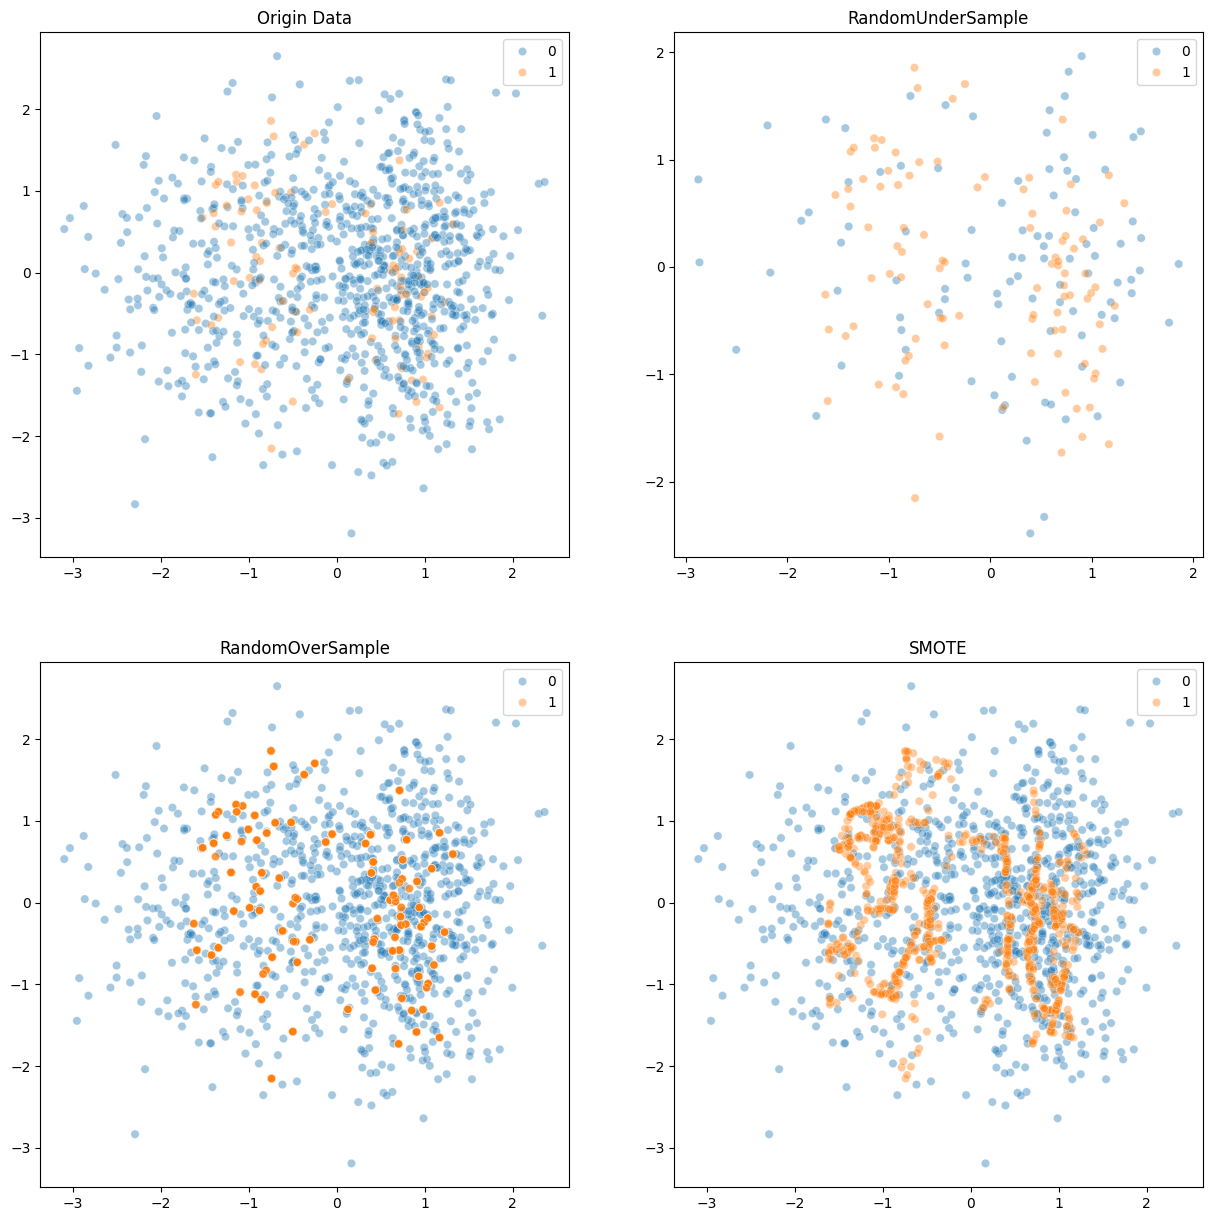

In [218]:
# 도화지의 영역을 행을2개 열로 2개로 나눈다. 
fig, axes = plt.subplots(nrows = 2, ncols= 2, figsize = (15, 15))

# 산점도 그래프를 생성 
sns.scatterplot(
    x = x[:, 2], y = x[:, 3], ax=axes[0][0], hue=y, alpha = 0.4
)
sns.scatterplot(
    x = x_under[:, 2], y = x_under[:, 3], ax=axes[0][1], hue=y_under, alpha = 0.4
)
sns.scatterplot(
    x = x_over[:, 2], y = x_over[:, 3], ax = axes[1][0], hue=y_over, alpha=0.4
)
sns.scatterplot(
    x = x_sm[:, 2], y = x_sm[:, 3], ax=axes[1][1], hue=y_sm, alpha=0.4
)
axes[0][0].set_title('Origin Data')
axes[0][1].set_title('RandomUnderSample')
axes[1][0].set_title('RandomOverSample')
axes[1][1].set_title('SMOTE')

plt.show()